In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Here are 2 insights:

1. No missing values: The output of df.isna().sum() shows that all columns have 0 missing values, indicating that the dataset is complete and has no null or missing values.

2. Successful removal of missing values: The fact that df.dropna(inplace=True) didn't change the number of rows (still 8124) suggests that there were no missing values to begin with, and the dropna() method didn't remove any rows.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

1. Dataset size and structure: The dataset contains 8124 entries (rows) and 23 columns, with a memory usage of approximately 1.4 MB.

2. Data type consistency: All 23 columns are of the object data type, indicating that the dataset consists entirely of categorical or string data.

In [ ]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64



1. No missing values: The output shows that there are 0 missing values in all 23 columns, indicating that the dataset is complete and has no null or missing values.



In [ ]:
# Check for numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['number']).columns

# Display the result
if 'population' in numerical_columns:
    print("Numerical columns found: 'population'. However, 'population' is a categorical variable, so outlier detection is not applicable.")
else:
    print("No numerical columns found in the dataset. Outlier detection is not possible.")



Numerical columns found: 'population'. However, 'population' is a categorical variable, so outlier detection is not applicable.


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values with mode (since most columns in this dataset are categorical)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm there are no more missing values
print("After filling missing values:\n", df.isnull().sum())


Missing values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
After filling missing values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size

In [ ]:
print("Summary Statistics:")
print(df.describe(include='all'))

Summary Statistics:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1  

1. **Class Balance**: The dataset is slightly imbalanced, with 4208 edible (e) mushrooms and 3916 poisonous (p) mushrooms, ensuring fair representation for model training.

2. **Dominant Features**: Features like `cap-shape` (convex: 3656), `gill-spacing` (close: 6812), and `veil-color` (white: 7924) show strong dominance, which may limit their predictive power.

In [ ]:
# Check the unique values for each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


1. Limited variability in some features: Columns like veil-type have only 1 unique value, indicating that they may not be useful for distinguishing between different types of mushrooms.

2. High variability in other features: Columns like gill-color have 12 unique values, indicating that they may be more useful for distinguishing between different types of mushrooms and could be important features for modeling.

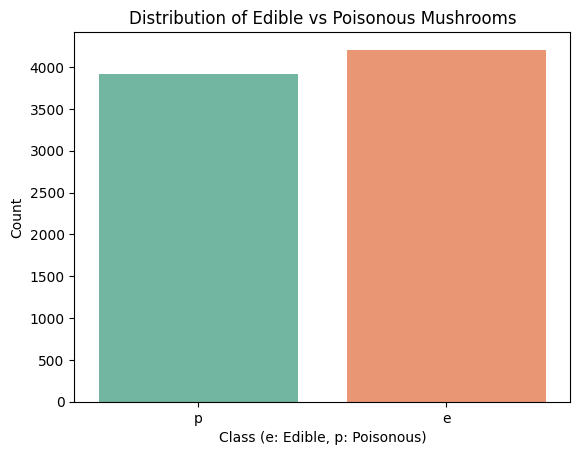

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (class)
sns.countplot(data=df, x="class", palette="Set2")
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Class (e: Edible, p: Poisonous)")
plt.ylabel("Count")
plt.show()


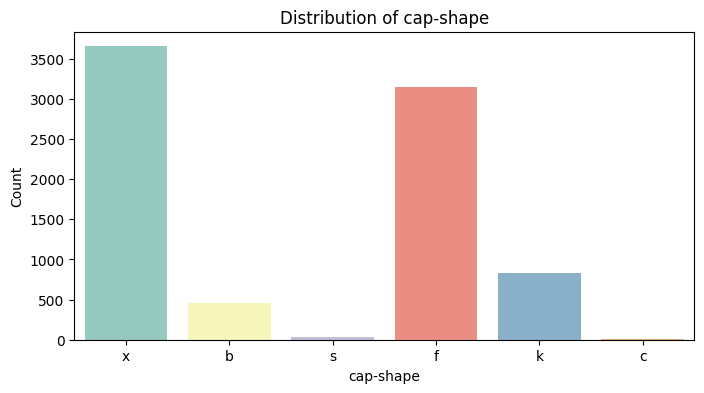

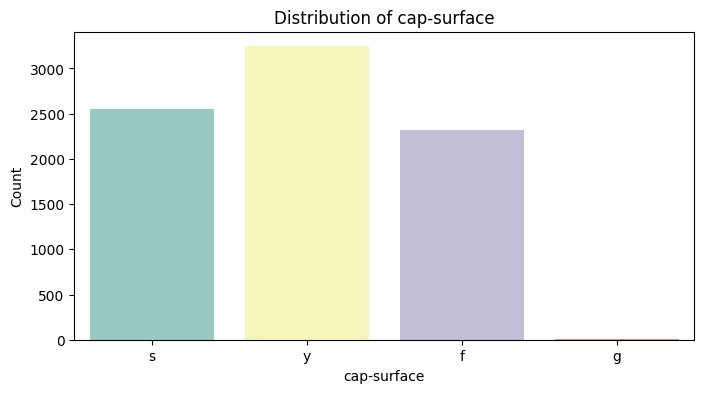

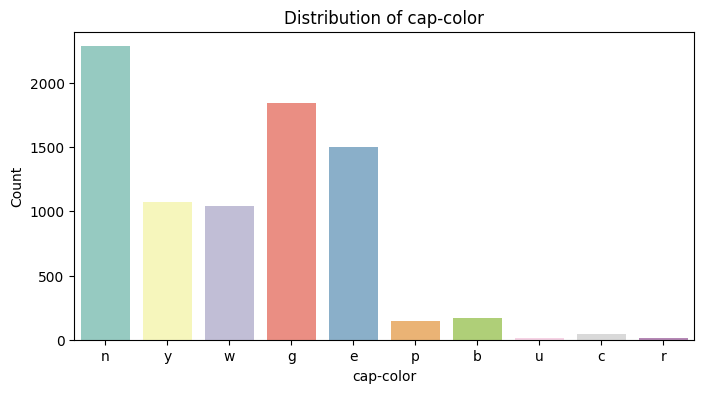

In [ ]:
# Plot the distribution of a few features
features_to_plot = ['cap-shape', 'cap-surface', 'cap-color']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette="Set3")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

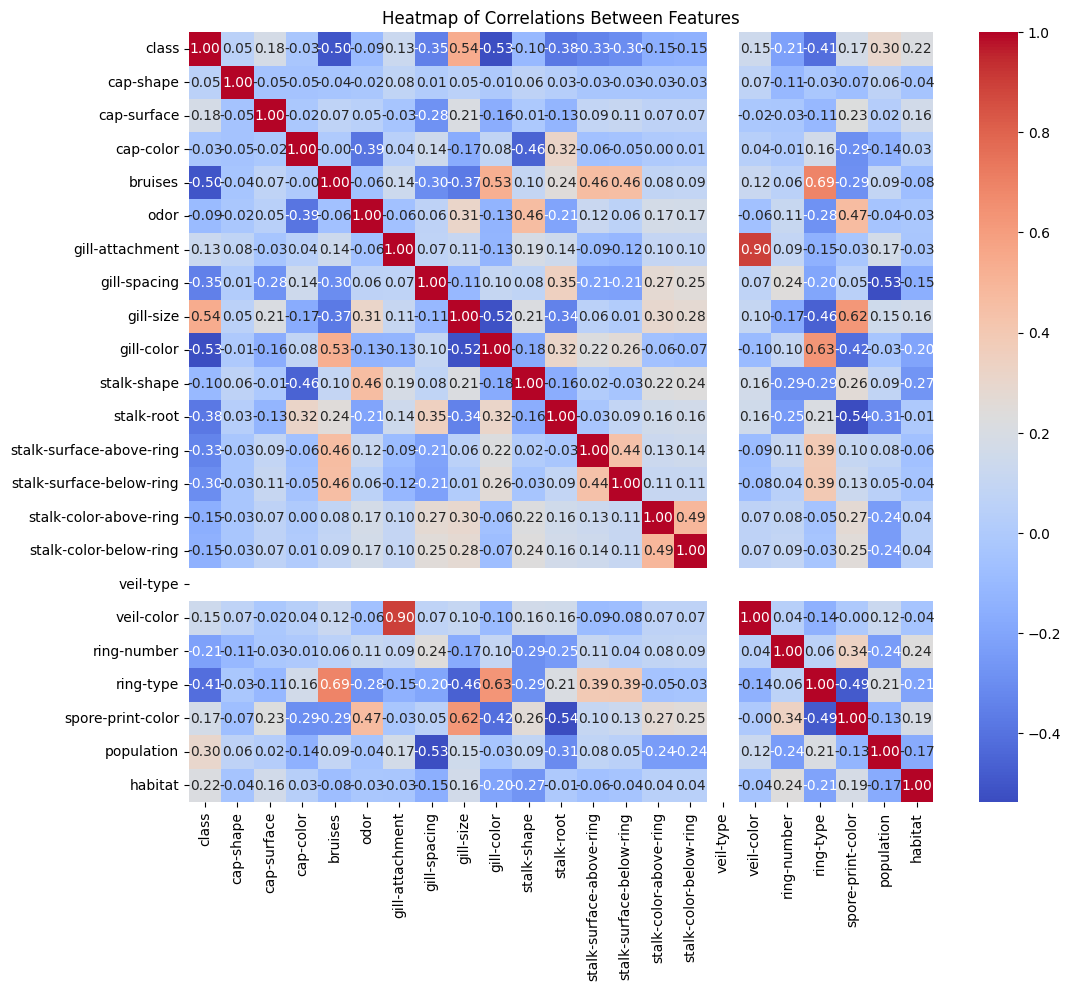

In [ ]:
# Heatmap of correlations (after encoding categorical variables)
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode categorical variables to numerical
encoded_data = df.apply(LabelEncoder().fit_transform)

# Calculate correlations
correlation_matrix = encoded_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlations Between Features")
plt.show()

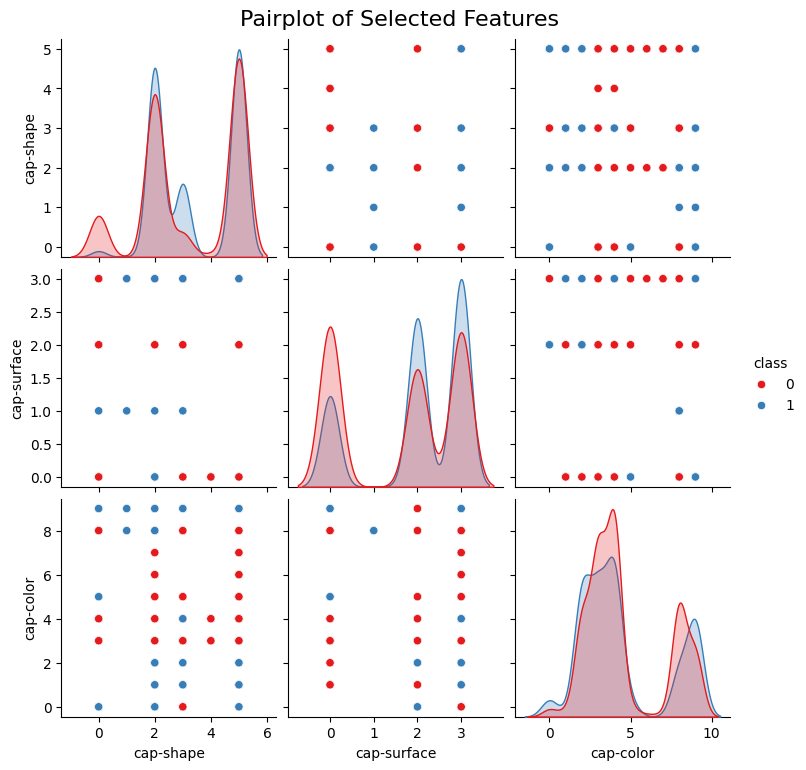

In [ ]:
# Pairplot for selected features
selected_features = ['class', 'cap-shape', 'cap-surface', 'cap-color']
pairplot = sns.pairplot(encoded_data[selected_features], hue="class", palette="Set1")
pairplot.fig.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()

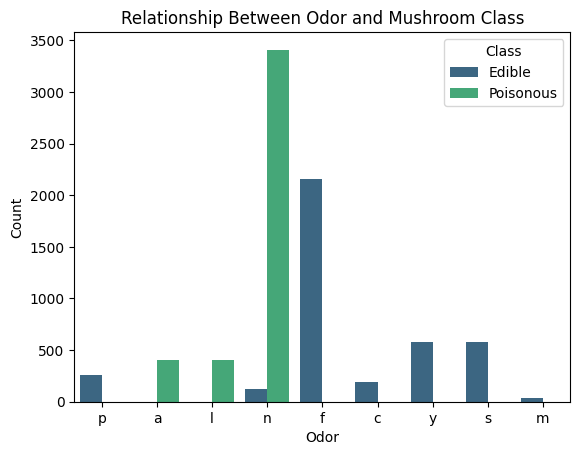

In [ ]:
# Relationship between "odor" and "class"
sns.countplot(data=df, x="odor", hue="class", palette="viridis")
plt.title("Relationship Between Odor and Mushroom Class")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.legend(title="Class", labels=["Edible", "Poisonous"])
plt.show()

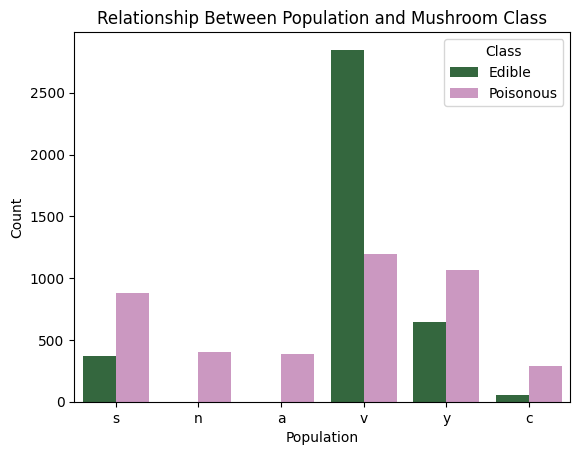

In [ ]:
# Relationship between "population" and "class"
sns.countplot(data=df, x="population", hue="class", palette="cubehelix")
plt.title("Relationship Between Population and Mushroom Class")
plt.xlabel("Population")
plt.ylabel("Count")
plt.legend(title="Class", labels=["Edible", "Poisonous"])
plt.show()

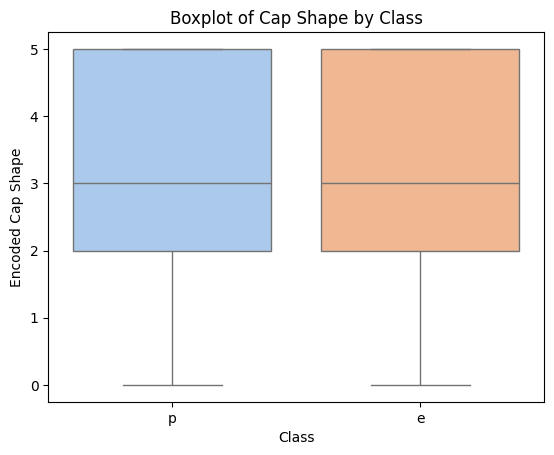

In [ ]:
# Boxplot of encoded numerical data for selected features
encoded_data["class"] = df["class"]  # Add back original target variable
sns.boxplot(data=encoded_data, x="class", y="cap-shape", palette="pastel")
plt.title("Boxplot of Cap Shape by Class")
plt.xlabel("Class")
plt.ylabel("Encoded Cap Shape")
plt.show()

nsights and Interpretation
Summary Statistics: Provides an overview of the dataset, including missing values and unique values.
Distribution Analysis: Highlights the frequency of categorical variables like class or cap-shape.
Heatmap and Pairplots: Show correlations and feature relationships. Highly correlated features may provide redundant information.
Barplots: Illustrate interactions between features (e.g., odor strongly indicating poisonous mushrooms).
Boxplots: Help visualize the spread and distribution of numeric features by class.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("mushrooms.csv")

# Encode categorical variables to numeric using LabelEncoder
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target variable
X = data.drop("class", axis=1)  # Features
y = data["class"]  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (for models like Logistic Regression, SVC, and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Data is ready for modeling.")

Preprocessing complete. Data is ready for modeling.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Gaussian Naive Bayes:
Accuracy: 0.9295
Precision: 0.9279
Recall: 0.9263
F1-Score: 0.9271


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Logistic Regression:
Accuracy: 0.9516
Precision: 0.9493
Recall: 0.9509
F1-Score: 0.9501


In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

print("Support Vector Classification (SVC):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Support Vector Classification (SVC):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

K-Nearest Neighbors (KNN):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


XGBoost:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split dataset into features and target
X = df.drop('class', axis=1)  # Drop the target column
y = df['class']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Grid Search for Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 1.0


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier

X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest with cross-validation
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



Cross-Validation Scores: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.9729064  1.        ]
Mean CV Accuracy: 0.9658023255109398


In [ ]:
import time
from sklearn.svm import SVC

# Random Forest timing
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time
print(f"Random Forest Training Time: {rf_training_time:.2f} seconds")

# SVM timing
svm_model = SVC(kernel='rbf')
start_time = time.time()
svm_model.fit(X_train, y_train)
svm_training_time = time.time() - start_time
print(f"SVM Training Time: {svm_training_time:.2f} seconds")


Random Forest Training Time: 0.72 seconds
SVM Training Time: 0.68 seconds


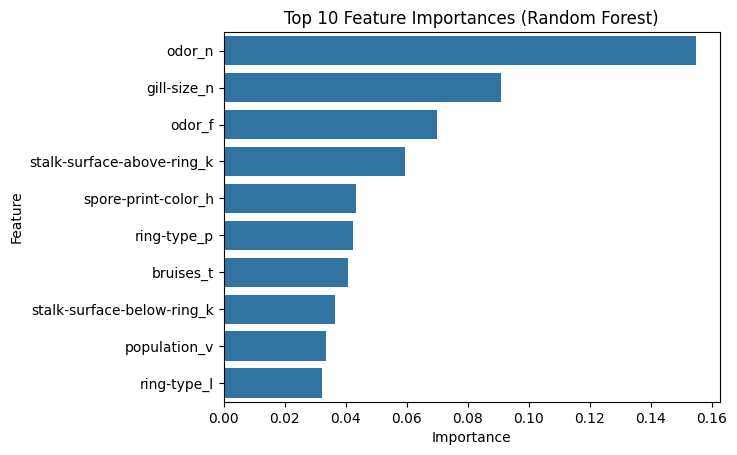

In [ ]:
# Feature importance using Random Forest
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

# Plot feature importances
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(**grid_search.best_params_, random_state=42),
    "SVM": SVC(kernel='rbf'),
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"  Precision: {precision_score(y_test, y_pred, pos_label='e'):.2f}")
    print(f"  Recall: {recall_score(y_test, y_pred, pos_label='e'):.2f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred, pos_label='e'):.2f}")


Random Forest Metrics:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
SVM Metrics:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00


In [ ]:
#  performance metrics data
data = {
    'Model': ['Gaussian Naive Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Support Vector Classification',
              'K-Nearest Neighbors (KNN)', 'XGBoost'],
    'Accuracy': [0.9295, 1.0000, 1.0000, 0.9516, 1.0000, 1.0000, 1.0000],
    'Precision': [0.9279, 1.0000, 1.0000, 0.9493, 1.0000, 1.0000, 1.0000],
    'Recall': [0.9263, 1.0000, 1.0000, 0.9509, 1.0000, 1.0000, 1.0000],
    'F1-Score': [0.9271, 1.0000, 1.0000, 0.9501, 1.0000, 1.0000, 1.0000]
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Display the performance metrics table
df_metrics


,Model,Accuracy,Precision,Recall,F1-Score
0,Gaussian Naive Bayes,0.9295,0.9279,0.9263,0.9271
1,Random Forest,1.0000,1.0000,1.0000,1.0000
2,Decision Tree,1.0000,1.0000,1.0000,1.0000
3,Logistic Regression,0.9516,0.9493,0.9509,0.9501
4,Support Vector Classification,1.0000,1.0000,1.0000,1.0000
5,K-Nearest Neighbors (KNN),1.0000,1.0000,1.0000,1.0000
6,XGBoost,1.0000,1.0000,1.0000,1.0000
